베이지 분류기


   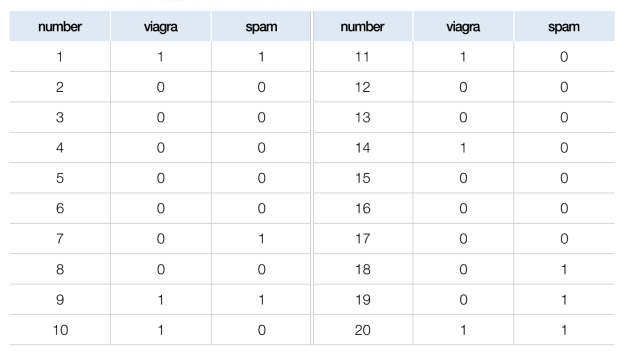

   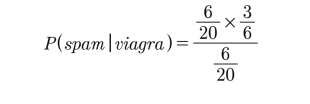

In [1]:
import pandas as pd
import numpy as np
v_s = {
    'viagra' : [1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1],
    'spam' :   [1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,1]
}
df = pd.DataFrame(v_s, columns = ['viagra','spam'])
df.head()

,viagra,spam
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [5]:
data = df.values
sum((data[:,0] == 1) & (data[:,1]==1)) / 20

0.15

In [6]:
# P(viagra)
p_viagra = sum(data[:,0] == 1) / len(data)
# P(spam)
p_spam = sum(data[:,1] == 1) / len(data)
# P(viagra & spam)
p_v_cap_s = sum((data[:,0] == 1) & (data[:,1] == 1)) / len(data)
# P(~viagra & spam)
p_nv_cap_s = sum((data[:,0] == 0) & (data[:,1] == 1)) / len(data)

베이즈 정리를 적용해서  'viagra'라는 단어가 들어갔을때 스펨일 확률 P(spam|viagra)

In [7]:
p_spam * ( p_v_cap_s / p_spam) / p_viagra

0.5

베이즈 정리를 적용해서  'viagra'라는 단어가 들어가지 않았을때 스펨일 확률 P(spam|~viagra)

In [8]:
p_spam * ( p_nv_cap_s / p_spam) / (1-p_viagra)

0.2142857142857143

스펨을 분류하는데 'viagra' 단어외에 더 많은 요인이 있을 가능성

스펨이 아닌 메일에 'viagra' 가 있을 가능성...

--> Naive Bayesian Classifier  :  나이브 베이지안 분류기

In [9]:
# 사이킷런으로 구현한 라이브러리
from sklearn.naive_bayes import GaussianNB

In [10]:
url = 'https://raw.githubusercontent.com/leekyuyoung20230313/pythone/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/data/basian.csv'

In [11]:
df = pd.read_csv(url)
df.head()

,ID,History,CoApplicant,Accommodation,Fraud
0,1,current,none,own,True
1,2,paid,none,own,False
2,3,paid,none,own,False
3,4,paid,guarantor,rent,True
4,5,arrears,none,own,False


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             20 non-null     int64 
 1   History        20 non-null     object
 2   CoApplicant    20 non-null     object
 3   Accommodation  20 non-null     object
 4   Fraud          20 non-null     bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 788.0+ bytes


In [13]:
x_df = df.drop(columns=['ID','Fraud'])
y_df = df['Fraud']

In [15]:
x_df = pd.get_dummies(x_df)
x_df.head().T

,0,1,2,3,4
History_arrears,0,0,0,0,1
History_current,1,0,0,0,0
History_none,0,0,0,0,0
History_paid,0,1,1,1,0
CoApplicant_coapplicant,0,0,0,0,0
CoApplicant_guarantor,0,0,0,1,0
CoApplicant_none,1,1,1,0,1
Accommodation_free,0,0,0,0,0
Accommodation_own,1,1,1,0,1
Accommodation_rent,0,0,0,1,0


In [17]:
x_data = x_df.values
y_data = y_df.values

베이지안 수식을 적용

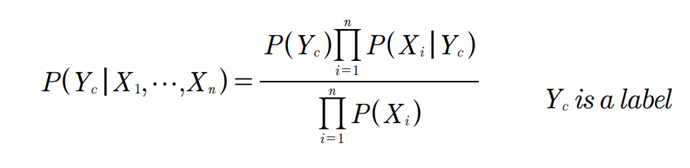

In [19]:
# y가 true 인경우와 false인경우의 값을 각각 확률로 표현
P_Y_True = sum(y_data == True) / len(y_data)
P_Y_False = 1- P_Y_True
P_Y_True, P_Y_False

(0.3, 0.7)

In [21]:
# P(Xi | Yc)   여기서 Yc의 구하면.. npWhere
np.where(y_data)

(array([ 0,  3,  5,  9, 11, 12]),)

In [22]:
# P(Ytrue)  P(Yfalse)
ix_Y_True = np.where(y_data)
ix_Y_False = np.where(y_data == False)
ix_Y_True,ix_Y_False

((array([ 0,  3,  5,  9, 11, 12]),),
 (array([ 1,  2,  4,  6,  7,  8, 10, 13, 14, 15, 16, 17, 18, 19]),))

In [23]:
p_x_y_true = (x_data[ix_Y_True].sum(axis=0)) / sum(y_data == True)
p_x_y_false = (x_data[ix_Y_False].sum(axis=0)) / sum(y_data == False)
p_x_y_true, p_x_y_false

(array([0.16666667, 0.5       , 0.16666667, 0.16666667, 0.        ,
        0.16666667, 0.83333333, 0.        , 0.66666667, 0.33333333]),
 array([0.42857143, 0.28571429, 0.        , 0.28571429, 0.14285714,
        0.        , 0.85714286, 0.07142857, 0.78571429, 0.14285714]))

In [24]:
# 최종적으로 Xn의 데이터를 가지고 있다고 가정
x_test = [0,1,0,0,0,1,0,0,1,0]
p_y_true_test = P_Y_True + p_x_y_true.dot(x_test)
p_y_false_test = P_Y_False + p_x_y_false.dot(x_test)
p_y_true_test,p_y_false_test

(1.6333333333333333, 1.7714285714285714)

In [25]:
p_y_true_test < p_y_false_test

True

이진 나이브 베이지안 분류기 구현
  - sports / not sports로 구분하는 분류기

In [26]:
y_example_text = ['Sports','Not sports','Sports','Sports','Not sports']
y_example = [ 1 if c == 'Sports' else 0 for c in y_example_text ]
y_example

[1, 0, 1, 1, 0]

In [27]:
text_example = [ "A greate game game","The The election was over", "Very clean game mathc",
    "A clean but forgettable game game", "It was a close election"
]

텍스트 데이터 - 벡터형태
  - BoW(Bag of Words) : one hot encoding 기법

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
countvect_example =  CountVectorizer()
x_example =  countvect_example.fit_transform(text_example)
countvect_example.get_feature_names_out()

array(['but', 'clean', 'close', 'election', 'forgettable', 'game',
       'greate', 'it', 'mathc', 'over', 'the', 'very', 'was'],
      dtype=object)

In [31]:
x_example.toarray()

array([[0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1],
       [0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0],
       [1, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1]])

각 단어들의 인덱스

In [32]:
countvect_example.vocabulary_

{'greate': 6,
 'game': 5,
 'the': 10,
 'election': 3,
 'was': 12,
 'over': 9,
 'very': 11,
 'clean': 1,
 'mathc': 8,
 'but': 0,
 'forgettable': 4,
 'it': 7,
 'close': 2}

사이킷런으로 20newsgorup 분류하기

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
from sklearn.datasets import fetch_20newsgroups
news = fetch_20newsgroups(subset='all')
news.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [ ]:
print(news.DESCR)

In [43]:
print(news.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [44]:
news_df = pd.DataFrame({
    'News' : news['data'],
    'Target' : news.target
})
news_df.head()

,News,Target
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [51]:
target_dic = { idx:name  for idx,name in enumerate( news.target_names ) }
news_df['Target'] = news_df['Target'].replace(target_dic)

이메일 제거

불필요한 숫자 제거

문자가 아닌 특수문자 제거

단어사이 공백제거

In [53]:
import re
def data_cleansing(df):
    delete_email = re.sub(r'\b[\w\+]+@[\w]+.[\w]+.[\w]+.[\w]+\b', ' ', df)
    delete_number = re.sub(r'\b|\d+|\b', ' ',
                           delete_email)
    delete_non_word = re.sub(r'\b[\W]+\b', ' ',
                             delete_number)
    cleaning_result =' '.join(delete_non_word.split())
    return cleaning_result

news_df.loc[:, 'News'] = news_df['News'].apply(data_cleansing)
news_df.head()

,News,Target
0,From Mamatha Devineni Ratnam Subject Pens fans...,rec.sport.hockey
1,From Matthew B Lawson Subject Which high perfo...,comp.sys.ibm.pc.hardware
2,From hilmi Hilmi Eren Subject Re ARMENIA SAYS ...,talk.politics.mideast
3,From Guy Dawson Subject Re IDE vs SCSI DMA and...,comp.sys.ibm.pc.hardware
4,From Alexander Samuel McDiarmid Subject driver...,comp.sys.mac.hardware


In [54]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [57]:
from nltk import stem
stmmer = stem.SnowballStemmer('english')
sentence = 'looking looks looked'
[stmmer.stem(word) for word in  sentence.split()]

['look', 'look', 'look']

In [59]:
stmmer.stem('imagination')

'imagin'

어간추출의 이유:
  - 단어개수가 줄어들고
  - 벡터의 크기가 작아져서 연산량을 줄임  

In [60]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB,GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.feature_extraction.text import CountVectorizer
import nltk

enlish_stemmer = nltk.stem.SnowballStemmer("english")
class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer,self).build_analyzer()
        return lambda doc: (enlish_stemmer.stem(w) for w in analyzer(doc))

from sklearn.feature_extraction.text import TfidfVectorizer

enlish_stemmer = nltk.stem.SnowballStemmer("english")
class StemmedTfidfVectorizer(TfidfVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedTfidfVectorizer,self).build_analyzer()
        return lambda doc: (enlish_stemmer.stem(w) for w in analyzer(doc))

vectorizer = [CountVectorizer(), TfidfVectorizer(), 
StemmedCountVectorizer(), StemmedTfidfVectorizer()]
# algorithms = [BernoulliNB(), MultinomialNB(), GaussianNB(), LogisticRegression()]
algorithms = [MultinomialNB(), LogisticRegression()]

pipelines = []
import itertools
for case in list(itertools.product(vectorizer, algorithms)):
 pipelines.append(make_pipeline(*case))
ngrams_params = [(1,1),(1,3)]
stopword_params = ["english"]
lowercase_params = [True, False]
max_df_params = np.linspace(0.4, 0.6, num=6)
min_df_params = np.linspace(0.0, 0.0, num=1)

attributes = {"ngram_range":ngrams_params, "max_df":max_df_params,"min_df":min_df_params, "lowercase":lowercase_params,"stop_words":stopword_params}
vectorizer_names = ["countvectorizer","tfidfvectorizer","stemmedcount vectorizer","stemmedtfidfvectorizer"]
vectorizer_params_dict = {}

for vect_name in vectorizer_names:
    vectorizer_params_dict[vect_name] = {}
    for key, value in attributes.items():
        param_name = vect_name + "__" + key
        vectorizer_params_dict[vect_name][param_name] = value
algorithm_names = ["multinomialnb", "logisticregression"]

algorithm_params_dict = {}
alpha_params = np.linspace(1.0, 1.0, num=1)
for i in range(1):
    algorithm_params_dict[algorithm_names[i]] = {
        algorithm_names[i]+ "__alpha" : alpha_params 
    }
c_params = [0.1, 5.0, 7.0, 10.0, 15.0, 20.0, 100.0]

algorithm_params_dict[algorithm_names[1]] = [{
    "logisticregression__multi_class" : ["multinomial"],
    "logisticregression__solver" : ["saga"],
    "logisticregression__penalty" : ["l1"],
    "logisticregression__C" : c_params
    },{
    "logisticregression__multi_class" : ["ovr"],
    "logisticregression__solver" : ['liblinear'],
    "logisticregression__penalty" : ["l2"],
    "logisticregression__C" : c_params
   }
    ]
pipeline_params= []
for case in list(itertools.product(vectorizer_names, algorithm_names)):
    vect_params = vectorizer_params_dict[case[0]].copy()
    algo_params = algorithm_params_dict[case[1]]
 
    if isinstance(algo_params, dict):
        vect_params.update(algo_params)
        pipeline_params.append(vect_params)
    else:
        temp = []
        for param in algo_params:
            vect_params.update(param)
            temp.append(vect_params)
        pipeline_params.append(temp)
from sklearn.preprocessing import LabelEncoder

X_data = news_df.loc[:, 'News'].tolist()
y_data = news_df['Target'].tolist()
y = LabelEncoder().fit_transform(y_data)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

scoring = ['accuracy']
estimator_results = []
for i, (estimator, params) in enumerate(zip(pipelines,pipeline_params)):
    n_jobs = -1
    gs_estimator = GridSearchCV(refit="accuracy", estimator=estimator,param_grid=params, scoring=scoring, cv=5, verbose=1, n_jobs=n_jobs)
    print(gs_estimator)

    gs_estimator.fit(X_data, y)
    estimator_results.append(gs_estimator)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'countvectorizer__lowercase': [True, False],
                         'countvectorizer__max_df': array([0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 ]),
                         'countvectorizer__min_df': array([0.]),
                         'countvectorizer__ngram_range': [(1, 1), (1, 3)],
                         'countvectorizer__stop_words': ['english'],
                         'multinomialnb__alpha': array([1.])},
             refit='accuracy', scoring=['accuracy'], verbose=1)
Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer', CountVectorizer()),
                                       ('logisticregression',
                                        LogisticRegression())]),
           

KeyboardInterrupt: ignored